In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv("SampleSuperstore.csv")
df.head(100)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Standard Class,Home Office,United States,Portland,Oregon,97206,West,Office Supplies,Binders,5.6820,1,0.70,-3.7880
96,Second Class,Home Office,United States,New York City,New York,10009,East,Furniture,Furnishings,96.5300,7,0.00,40.5426
97,First Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Binders,51.3120,3,0.20,17.9592
98,Standard Class,Corporate,United States,Saint Paul,Minnesota,55106,Central,Office Supplies,Appliances,77.8800,6,0.00,22.5852


In [4]:
print(pd.unique(df['Ship Mode']))
print(len(pd.unique(df.City)))
print(pd.unique(df.State))
print(pd.unique(df['Category']))

['Second Class' 'Standard Class' 'First Class' 'Same Day']
531
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['Furniture' 'Office Supplies' 'Technology']


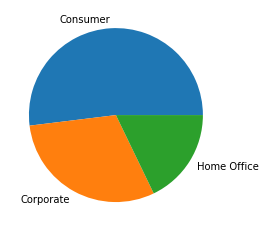

In [5]:

plt.pie(df['Segment'].value_counts(),labels = df.Segment.unique())
plt.show()

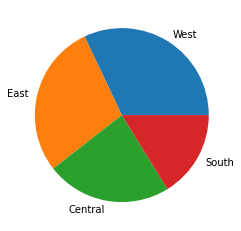

In [6]:
Region = dict(df['Region'].value_counts())
labels = list(Region.keys())
values = list(Region.values())
plt.pie(values, labels = labels)
plt.show()

<AxesSubplot:xlabel='Segment'>

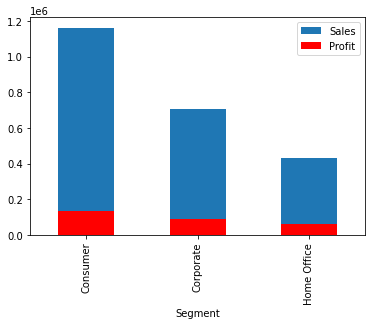

In [76]:
consumer_sales_total = round(df[df['Segment'] == "Consumer"]['Sales'].astype(float).sum())
corporate_sales_total = round(df[df['Segment'] == "Corporate"]['Sales'].astype(float).sum())
home_sales_total = round(df[df['Segment'] == "Home Office"]['Sales'].astype(float).sum())

consumer_profit_total = round(df[df['Segment'] == "Consumer"]['Profit'].astype(float).sum())
corporate_profit_total = round(df[df['Segment'] == "Corporate"]['Profit'].astype(float).sum())
home_profit_total = round(df[df['Segment'] == "Home Office"]['Profit'].astype(float).sum())

sales_df = pd.DataFrame({'Segment':[x for x in df.Segment.unique()],'Sales':[consumer_sales_total,
corporate_sales_total,home_sales_total]})

profit_df = pd.DataFrame({'Segment':[x for x in df.Segment.unique()],'Profit':[consumer_profit_total,
corporate_profit_total,home_profit_total]})

ax = sales_df.plot(x = "Segment" , y = "Sales", kind = "bar")
profit_df.plot(x = "Segment", y = "Profit", kind = "bar", ax = ax, color = 'red')






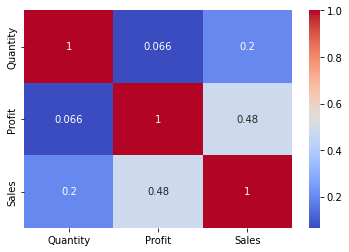

In [249]:
corr = df[['Quantity','Profit','Sales']].corr()
dataplot = sns.heatmap(corr, cmap= 'coolwarm', annot = True)


<AxesSubplot:xlabel='Region'>

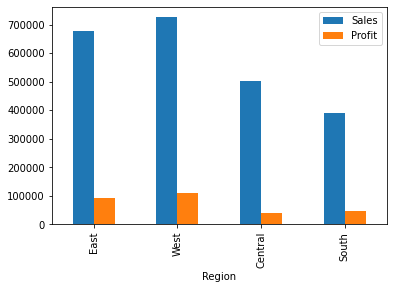

In [183]:
east_states = df[df["Region"] == 'East'][['Profit','Sales']].sum().to_dict()
west_states = df[df["Region"] == 'West'][['Profit','Sales']].sum().to_dict()
central_states = df[df["Region"] == 'Central'][['Profit','Sales']].sum().to_dict()
south_states = df[df["Region"] == 'South'][['Profit','Sales']].sum().to_dict()


sales = [east_states['Sales'],west_states['Sales'],central_states['Sales'],south_states['Sales']]
profit = [east_states['Profit'],west_states['Profit'],central_states['Profit'],south_states['Profit']]
region = ['East','West','Central','South']

bystate = pd.DataFrame({'Region':region,'Sales':sales,'Profit':profit})
bystate.plot(kind = 'bar', x = 'Region')


C:\Users\User\AppData\Local\Temp\ipykernel_32816\2506295064.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  furniture_cpm = pd.DataFrame(furniture.groupby('Sub-Category')['Profit','Sales'].sum())
C:\Users\User\AppData\Local\Temp\ipykernel_32816\2506295064.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  office_cpm = pd.DataFrame(office.groupby('Sub-Category')['Profit','Sales'].sum())
C:\Users\User\AppData\Local\Temp\ipykernel_32816\2506295064.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tech_cpm = pd.DataFrame(tech.groupby('Sub-Category')['Profit','Sales'].sum())


<AxesSubplot:ylabel='Technology'>

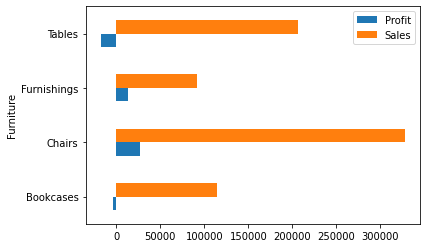

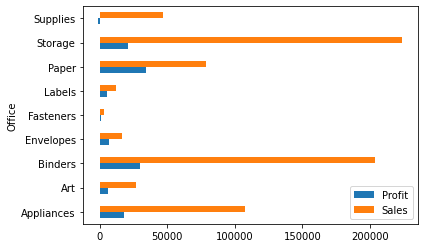

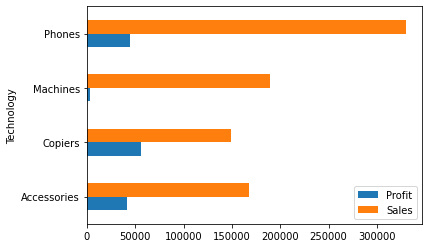

In [247]:
category = df['Category'].unique()
furniture = df[df["Category"] == 'Furniture']
office = df[df["Category"] == 'Office Supplies']
tech = df[df["Category"] == 'Technology']

ps = ['Profit','Sales']
office['Sub-Category'].unique()


furniture_cpm = pd.DataFrame(furniture.groupby('Sub-Category')['Profit','Sales'].sum())
office_cpm = pd.DataFrame(office.groupby('Sub-Category')['Profit','Sales'].sum())
tech_cpm = pd.DataFrame(tech.groupby('Sub-Category')['Profit','Sales'].sum())

furniture_cpm.plot(kind = "barh", xlabel="Furniture")
office_cpm.plot(kind = "barh",xlabel="Office")
tech_cpm.plot(kind = "barh",xlabel="Technology")


